In [2]:
import pandas as pd
import numpy as np

# Load the data
fake_df = pd.read_csv("dataset/Fake.csv")
real_df = pd.read_csv("dataset/True.csv")

# Add labels
fake_df['label'] = 0
real_df['label'] = 1

# Combine both datasets
df = pd.concat([fake_df, real_df], ignore_index=True)
df = df[['title', 'text', 'label']]  # Keep only useful cols

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Preview
df.head()


,title,text,label
0,This Is Great! ONE BRUTAL IMAGE Perfectly Capt...,You re gonna love this!The left has been screa...,0
1,Gohmert: Homosexuality Is ‘Perverse’ Because ...,Rep. Louie Gohmert is perhaps America s most t...,0
2,EU official says no sign Trump plans to ease R...,WASHINGTON (Reuters) - A senior European Union...,1
3,Obama Announces ‘Unfinished Business’ For 201...,President Obama began the new year of 2016 wit...,0
4,Trump angers UK with truculent tweet to May af...,LONDON (Reuters) - U.S. President Donald Trump...,1


In [3]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['text'] = df['text'].apply(lambda x: clean_text(str(x)))


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['text']
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9858574610244989

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4643
           1       0.99      0.99      0.99      4337

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Matplotlib is building the font cache; this may take a moment.


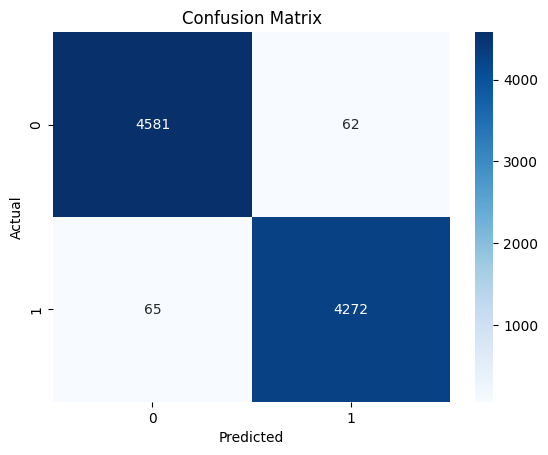

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
